In [5]:
from functions_for_all_nutrients import *
from iron_hemoglobin_functions import *

In [6]:
username = !whoami
username

['alibow']

In [7]:
index_cols=['location_id','sex_id','age_group_id']

age_group_ids = [2,3,4,5]
sex_ids = [1,2]
coverage_levels = [0.2,0.5,0.8]
years = [2021,2022,2023,2024,2025]

In [8]:
coverage_data_dir = f'/ihme/homes/{username[0]}/notebooks/vivarium_research_lsff/data_prep/outputs/lsff_input_coverage_data.csv'

In [9]:
location_ids = (list(
                pd.read_csv(coverage_data_dir)
                .location_id
                .unique()))
location_ids

[179, 163, 214, 161, 165, 190, 189, 196]

In [10]:
nutrient = 'iron'
vehicle = 'wheat flour'
effective_fractions = [0, 
                       0, 
                       0.1666666667, 
                       0.9166666667]

In [19]:
baseline_coverage, counterfactual_coverage = generate_overall_coverage_rates(
                                                     coverage_data_dir,
                                                     nutrient, 
                                                     vehicle,
                                                     coverage_levels,
                                                     years,
                                                     location_ids,
                                                    ['under-5','total population',np.nan])

# HEMOGLOBIN

In [20]:
from scipy.stats import norm

# mean and 0.975-quantile of normal distribution for mean difference (MD)
mean = 3
q_975 = 6.1

# 0.975-quantile of standard normal distribution (=1.96, approximately)
q_975_stdnorm = norm().ppf(0.975)

std = (q_975 - mean) / q_975_stdnorm # std dev of normal distribution

# Frozen normal distribution for MD, representing uncertainty in our effect size
hb_md_distribution = norm(mean, std)

In [21]:
mean_difference_hemoglobin_fort = generate_normal_rr_deficiency_nofort_draws(mean, std, location_ids)
mean_difference_hemoglobin_fort.head()

draws,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,draw_103,draw_104,draw_105,draw_106,...,draw_990,draw_991,draw_992,draw_993,draw_994,draw_995,draw_996,draw_997,draw_998,draw_999
location_id,,,,,,,,,,,,,,,,,,,,,
179,5.67384,2.263045,2.010783,1.632669,3.592127,3.619293,0.71747,3.769218,2.099288,5.25659,...,2.68253,2.315703,4.976409,5.670455,1.949907,3.061148,3.881265,2.227427,2.005891,1.92852
163,5.67384,2.263045,2.010783,1.632669,3.592127,3.619293,0.71747,3.769218,2.099288,5.25659,...,2.68253,2.315703,4.976409,5.670455,1.949907,3.061148,3.881265,2.227427,2.005891,1.92852
214,5.67384,2.263045,2.010783,1.632669,3.592127,3.619293,0.71747,3.769218,2.099288,5.25659,...,2.68253,2.315703,4.976409,5.670455,1.949907,3.061148,3.881265,2.227427,2.005891,1.92852
161,5.67384,2.263045,2.010783,1.632669,3.592127,3.619293,0.71747,3.769218,2.099288,5.25659,...,2.68253,2.315703,4.976409,5.670455,1.949907,3.061148,3.881265,2.227427,2.005891,1.92852
165,5.67384,2.263045,2.010783,1.632669,3.592127,3.619293,0.71747,3.769218,2.099288,5.25659,...,2.68253,2.315703,4.976409,5.670455,1.949907,3.061148,3.881265,2.227427,2.005891,1.92852


In [22]:
effective_baseline_coverage = get_effective_iron_hemoglobin_coverage(baseline_coverage, 
                                                                     sex_ids, 
                                                                     age_group_ids, 
                                                                     effective_fractions, 
                                                                     years)
effective_counterfactual_coverage = get_effective_iron_hemoglobin_coverage(counterfactual_coverage, 
                                                                     sex_ids, 
                                                                     age_group_ids, 
                                                                     effective_fractions, 
                                                                     years)

delta_effective_coverage = effective_counterfactual_coverage - effective_baseline_coverage
delta_effective_coverage

draw_0    draw_1  \
location_id sex_id age_group_id year coverage_level                       
161         1      2            2021 0.2             0.000000  0.000000   
                                     0.5             0.000000  0.000000   
                                     0.8             0.000000  0.000000   
                                2022 0.2             0.000000  0.000000   
                                     0.5             0.000000  0.000000   
...                                                       ...       ...   
214         2      5            2024 0.5             0.121163  0.117345   
                                     0.8             0.285652  0.284175   
                                2025 0.2            -0.043327 -0.049484   
                                     0.5             0.121163  0.117345   
                                     0.8             0.285652  0.284175   

                                                       draw_2    draw_3  \
location_id sex_id age_group_id year coverage_level                       
161         1      2            2021 0.2             0.000000  0.000000   
                                     0.5             0.000000  0.000000   
                                     0.8             0.000000  0.000000   
                                2022 0.2             0.000000  0.000000   
                                     0.5             0.000000  0.000000   
...                                                       ...       ...   
214         2      5            2024 0.5             0.123251  0.117623   
                                     0.8             0.286460  0.284283   
                                2025 0.2            -0.039959 -0.049036   
                                     0.5             0.123251  0.117623   
                                     0.8             0.286460  0.284283   

                                                       draw_4    draw_5  \
location_id sex_id age_group_id year coverage_level                       
161         1      2            2021 0.2             0.000000  0.000000   
                                     0.5             0.000000  0.000000   
                                     0.8             0.000000  0.000000   
                                2022 0.2             0.000000  0.000000   
                                     0.5             0.000000  0.000000   
...                                                       ...       ...   
214         2      5            2024 0.5             0.119950  0.128653   
                                     0.8             0.285183  0.288551   
                                2025 0.2            -0.045283 -0.031244   
                                     0.5             0.119950  0.128653   
                                     0.8             0.285183  0.288551   

                                                       draw_6    draw_7  \
location_id sex_id age_group_id year coverage_level                       
161         1      2            2021 0.2             0.000000  0.000000   
                                     0.5             0.000000  0.000000   
                                     0.8             0.000000  0.000000   
                                2022 0.2             0.000000  0.000000   
                                     0.5             0.000000  0.000000   
...                                                       ...       ...   
214         2      5            2024 0.5             0.119065  0.123503   
                                     0.8             0.284841  0.286558   
                                2025 0.2            -0.046710 -0.039551   
                                     0.5             0.119065  0.123503   
                                     0.8             0.284841  0.286558   

                                                       draw_8    draw_9  ...  \
location_id sex_id age_group_id year coverage_level                    

In [23]:
mean_hgb = generate_hemoglobin_values(delta_effective_coverage, 
                                      mean_difference_hemoglobin_fort,
                                      location_ids, age_group_ids, sex_ids)
mean_hgb.to_csv('anemia_files_u5/mean_hgb.csv')
mean_hgb

/ihme/homes/alibow/notebooks/vivarium_research_lsff/multiplication_models/iron_hemoglobin_functions.py:112: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  ignore_index=True)


draw_0  \
location_id sex_id age_group_id year_id coverage_level               
161         1      2            NaN     baseline        153.764447   
                   3            NaN     baseline        127.069234   
                   4            NaN     baseline        108.394954   
                   5            NaN     baseline        109.559302   
            2      2            NaN     baseline        154.765756   
...                                                            ...   
214         2      5            2024.0  0.5             100.806437   
                                        0.8             101.739724   
                                2025.0  0.2              99.873150   
                                        0.5             100.806437   
                                        0.8             101.739724   

                                                            draw_1  \
location_id sex_id age_group_id year_id coverage_level               
161         1      2            NaN     baseline        162.061641   
                   3            NaN     baseline        132.886735   
                   4            NaN     baseline        106.569739   
                   5            NaN     baseline        112.199090   
            2      2            NaN     baseline        159.978712   
...                                                            ...   
214         2      5            2024.0  0.5             102.104861   
                                        0.8             102.482404   
                                2025.0  0.2             101.727318   
                                        0.5             102.104861   
                                        0.8             102.482404   

                                                           draw_10  \
location_id sex_id age_group_id year_id coverage_level               
161         1      2            NaN     baseline        159.982495   
                   3            NaN     baseline        130.225829   
                   4            NaN     baseline        105.636577   
                   5            NaN     baseline        108.604511   
            2      2            NaN     baseline        155.456991   
...                                                            ...   
214         2      5            2024.0  0.5              98.741402   
                                        0.8              99.077065   
                                2025.0  0.2              98.405740   
                                        0.5              98.741402   
                                        0.8              99.077065   

                                                          draw_100  \
location_id sex_id age_group_id year_id coverage_level               
161         1      2            NaN     baseline        159.828745   
                   3            NaN     baseline        130.212727   
                   4            NaN     baseline        107.492919   
                   5            NaN     baseline        111.102709   
            2      2            NaN     baseline        155.983936   
...                                                            ...   
214         2      5            2024.0  0.5             100.590240   
                                        0.8             100.860598   
                                2025.0  0.2             100.319883   
                                        0.5             100.590240   
                                        0.8             100.860598   

                                                          draw_101  \
location_id sex_id age_group_id year_id coverage_level               
161         1      2            NaN     baseline        159.172649   
                   3            NaN     baseline        125.190682   
                   4            NaN     baseline        107.877297   
                   5            NaN     baseline        109.399169

In [24]:
hgb_sd = get_draws('modelable_entity_id',
                10488,
                source='epi',
                location_id=location_ids,
                age_group_id=age_group_ids,
                sex_id=sex_ids,
                year_id=2019,
                gbd_round_id=6,
                decomp_step='step4',
                status='best')
(hgb_sd.set_index(['location_id','sex_id','age_group_id'])
 .filter([c for c in hgb_sd if 'draw' in c])
 .reset_index()).to_csv('anemia_files_u5/sd_hgb.csv')

In [10]:
# NOW RUN HEMOGLOBIN_TO_ANEMIA.R FILE BEFORE RUNNING NEXT CELL
assert "Did you run the R file?" == "Double check :)", "Make sure you run the R file!"

AssertionError: Make sure you run the R file!

In [25]:
anemia = load_anemia_prev_and_calculate_ylds('anemia_files_u5/anemia_prev.csv')
baseline_anemia = (duplicate_over_simulation_years(anemia.loc[anemia.coverage_level=='baseline'], years)
                   .drop(columns='coverage_level')
                   .set_index(['location_id','age_group_id','sex_id','year','draw']))
counterfactual_anemia = (anemia.loc[anemia.coverage_level != 'baseline']
                         .set_index(['location_id','age_group_id','sex_id','year','draw','coverage_level']))
averted_anemia = baseline_anemia - counterfactual_anemia
averted_anemia

mild  \
location_id age_group_id sex_id year draw     coverage_level             
161         2            1      2021 draw_0   0.2             0.000000   
                                              0.5             0.000000   
                                              0.8             0.000000   
                                     draw_1   0.2             0.000000   
                                              0.5             0.000000   
...                                                                ...   
214         5            2      2025 draw_998 0.5             0.000271   
                                              0.8             0.000748   
                                     draw_999 0.2            -0.000122   
                                              0.5             0.000345   
                                              0.8             0.000933   

                                                              moderate  \
location_id age_group_id sex_id year draw     coverage_level             
161         2            1      2021 draw_0   0.2             0.000000   
                                              0.5             0.000000   
                                              0.8             0.000000   
                                     draw_1   0.2             0.000000   
                                              0.5             0.000000   
...                                                                ...   
214         5            2      2025 draw_998 0.5             0.006808   
                                              0.8             0.015020   
                                     draw_999 0.2            -0.002139   
                                              0.5             0.005274   
                                              0.8             0.012648   

                                                                severe  \
location_id age_group_id sex_id year draw     coverage_level             
161         2            1      2021 draw_0   0.2             0.000000   
                                              0.5             0.000000   
                                              0.8             0.000000   
                                     draw_1   0.2             0.000000   
                                              0.5             0.000000   
...                                                                ...   
214         5            2      2025 draw_998 0.5             0.000564   
                                              0.8             0.001224   
                                     draw_999 0.2            -0.000250   
                                              0.5             0.000605   
                                              0.8             0.001429   

                                                                anemic  \
location_id age_group_id sex_id year draw     coverage_level             
161         2            1      2021 draw_0   0.2             0.000000   
                                              0.5             0.000000   
                                              0.8             0.000000   
                                     draw_1   0.2             0.000000   
                                              0.5             0.000000   
...                                                                ...   
214         5            2      2025 draw_998 0.5             0.007643   
                                              0.8             0.016992   
                                     draw_999 0.2            -0.002511   
                                              0.5             0.006224   
                                              0.8             0.015011   

                                                                 mild_ylds  \
location_id age_group_id sex_id year draw     coverage_level                 
161         2            1      2021 draw_0   0.2         

In [26]:
counts, rates = population_weight_values(averted_anemia.reset_index(), age_group_ids, sex_ids, location_ids)

In [27]:
counts = summarize_data(counts)
rates = summarize_data(rates)

In [28]:
anemia_counts_averted = (counts.loc[counts.severity=='anemic']
     .loc[counts.measure=='ylds']
     .set_index(['location_id','coverage_level','year'])
     .drop(columns=['severity','measure']))

anemia_rates_averted = (rates.loc[rates.severity=='anemic']
     .loc[rates.measure=='ylds']
     .set_index(['location_id','coverage_level','year'])
     .drop(columns=['severity','measure']))
anemia_rates_averted.head()

draw                                draw_0    draw_1   draw_10  draw_100  \
location_id coverage_level year                                            
161         0.2            2021   0.000000  0.000000  0.000000  0.000000   
            0.5            2021   0.000000  0.000000  0.000000  0.000000   
            0.8            2021   0.000000  0.000000  0.000000  0.000000   
            0.2            2022  10.668596  3.200516  3.058414  2.675517   
            0.5            2022  26.878952  8.086589  7.728139  6.763730   

draw                              draw_101   draw_102  draw_103   draw_104  \
location_id coverage_level year                                              
161         0.2            2021   0.000000   0.000000  0.000000   0.000000   
            0.5            2021   0.000000   0.000000  0.000000   0.000000   
            0.8            2021   0.000000   0.000000  0.000000   0.000000   
            0.2            2022   5.462261   4.700115  1.122785   5.190530   
            0.5            2022  13.782817  11.856602  2.840263  13.106521   

draw                              draw_105   draw_106  ...   draw_990  \
location_id coverage_level year                        ...              
161         0.2            2021   0.000000   0.000000  ...   0.000000   
            0.5            2021   0.000000   0.000000  ...   0.000000   
            0.8            2021   0.000000   0.000000  ...   0.000000   
            0.2            2022   3.958972   8.570916  ...   4.839413   
            0.5            2022  10.002428  21.600814  ...  12.219231   

draw                              draw_991   draw_992   draw_993   draw_994  \
location_id coverage_level year                                               
161         0.2            2021   0.000000   0.000000   0.000000   0.000000   
            0.5            2021   0.000000   0.000000   0.000000   0.000000   
            0.8            2021   0.000000   0.000000   0.000000   0.000000   
            0.2            2022   4.207448   7.593087  11.930628   4.760800   
            0.5            2022  10.627072  19.124381  30.044922  12.029687   

draw                              draw_995   draw_996   draw_997  draw_998  \
location_id coverage_level year                                              
161         0.2            2021   0.000000   0.000000   0.000000  0.000000   
            0.5            2021   0.000000   0.000000   0.000000  0.000000   
            0.8            2021   0.000000   0.000000   0.000000  0.000000   
            0.2            2022   5.086897   6.500836   4.354859  2.840644   
            0.5            2022  12.844279  16.390030  11.001062  7.174004   

draw                             draw_999  
location_id coverage_level year            
161         0.2            2021  0.000000  
            0.5            2021  0.000000  
            0.8            2021  0.000000  
            0.2            2022  3.051433  
            0.5            2022  7.713347  

[5 rows x 1000 columns]

In [29]:
# total iron responsive anemia burden
iron_responsive_anemia_sequelae = [1004, 1005, 1006, 1008, 1009, 1010, 1012, 1013, 
                                   1014, 1016, 1017, 1018, 1020, 1021, 1022, 1024, 1025, 1026, 
                                   1028, 1029, 1030, 1032, 1033, 1034, 1361, 1364, 1367, 1373, 1376, 
                                   1379, 1385, 1388, 1391, 1397, 1400, 1403, 1409, 1412, 1415, 1421, 
                                   1424, 1427, 1433, 1436, 1439, 1445, 1448, 1451, 5213, 5216, 5219, 
                                   5222, 5225, 5228, 5237, 5240, 5243, 5246, 5249, 5252, 5261, 5264, 
                                   5267, 5270, 5273, 5276, 4985, 4988, 4991, 4994, 4997, 5000, 5009, 
                                   5012, 5015, 5678, 5681, 5684, 7214, 7217, 7220, 4952, 4955, 4958, 
                                   4961, 4964, 4967, 4976, 4979, 4982, 5627, 5630, 5633, 7202, 7205, 
                                   7208, 5393, 5396, 5399, 182, 183, 184, 240, 241, 242, 177, 178, 
                                   179, 144,145,146,172,173,174,525,526,527,1106,1107,1108,537,538,
                                   539,206,207,208, 22989, 22990, 22991, 22992, 22993, 22999, 23000, 
                                   23001, 23002, 23003, 23009, 23010, 23011, 23012, 23013,
                                   5567, 5570, 5573, 5579, 5582, 5585,
                                   23030, 23031, 23032, 23034, 23035, 23036, 23038, 23039, 23040,
                                   23042, 23043, 23044, 23046, 23047, 23048]

ira_ylds = get_draws('sequela_id', iron_responsive_anemia_sequelae, 
                 source='como',
                 location_id=location_ids, 
                 age_group_id=age_group_ids,
                 sex_id=sex_ids,
                 year_id=2019,
                 measure_id=3,
                 decomp_step='step5',
                 gbd_round_id=6)
ira_ylds = ira_ylds.groupby(['location_id','sex_id','age_group_id'], as_index=False).sum()

pop = get_population(location_id=location_ids,
                    age_group_id=age_group_ids,
                    sex_id=sex_ids,
                    gbd_round_id=6,
                    year_id=2019,
                    decomp_step='step4')

ira_ylds = ira_ylds.merge(pop, on=['location_id','sex_id','age_group_id'])
for i in list(range(0,1000)):
    ira_ylds[f'draw_{i}'] = ira_ylds[f'draw_{i}'] * ira_ylds['population']
ira_ylds = ira_ylds.groupby(['location_id']).sum()
for i in list(range(0,1000)):
    ira_ylds[f'draw_{i}'] = ira_ylds[f'draw_{i}'] / ira_ylds['population'] * 100_000
ira_ylds = ira_ylds.drop(columns=[c for c in ira_ylds.columns if 'draw' not in c])
ira_ylds.head()

,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,draw_103,draw_104,draw_105,draw_106,...,draw_990,draw_991,draw_992,draw_993,draw_994,draw_995,draw_996,draw_997,draw_998,draw_999
location_id,,,,,,,,,,,,,,,,,,,,,
161,1309.971271,1100.938247,871.735033,1178.864270,853.997440,887.995534,1185.751676,993.191289,1394.240084,699.974179,...,890.584371,1132.987544,977.608392,1111.075500,1267.866138,1211.418425,422.230480,872.434851,635.313862,835.508106
163,1892.548590,1776.260963,1404.685406,1752.609459,1452.245725,1708.810338,1833.642692,1374.829619,1948.984805,1157.058094,...,1390.509621,1671.151319,1658.863662,1479.985901,1508.159867,1641.553640,804.917947,1320.217765,1277.804721,1257.241748
165,1667.738296,1677.036297,1496.266974,1617.440988,1291.469372,1646.118419,1520.779114,1401.587701,2026.725882,1037.126464,...,1699.213958,1575.338251,1583.325593,1262.644203,1538.528039,1454.025108,779.945416,1219.572072,1498.775327,1227.537176
179,2090.305970,1866.508435,1561.032772,1940.712742,1502.543836,1863.066753,2097.522027,1447.410948,1989.487021,1285.813234,...,1494.920915,1939.814199,1828.484615,1619.419084,1656.751381,1794.860523,876.095132,1338.965653,1483.540253,1281.514699
189,1745.332808,1836.625738,1236.476563,1812.142288,1559.631701,1434.779845,1666.571883,1247.721842,2059.549520,1255.376999,...,1396.549059,1683.975029,1547.479533,1483.329093,1564.844264,1426.203605,708.047275,1216.272700,1193.923503,1362.995594


In [30]:
# check iron responsive portion
impairment_anemia = get_draws(gbd_id_type='rei_id',
         gbd_id=[192],
         source='como',
         location_id=location_ids,
         sex_id=sex_ids,
         age_group_id=1,
         gbd_round_id=6,
         year_id=2019,
         decomp_step='step5',
         measure_id=[3])
impairment_anemia = impairment_anemia.loc[impairment_anemia.cause_id==294]
impairment_anemia = impairment_anemia.merge(pop, on=['location_id','sex_id'])
for i in list(range(0,1000)):
    impairment_anemia[f'draw_{i}'] = impairment_anemia[f'draw_{i}'] * impairment_anemia['population']
impairment_anemia = impairment_anemia.groupby(['location_id','measure_id','rei_id']).sum()
for i in list(range(0,1000)):
    impairment_anemia[f'draw_{i}'] = impairment_anemia[f'draw_{i}'] / impairment_anemia['population'] * 100_000
impairment_anemia = impairment_anemia.drop(columns=[c for c in impairment_anemia.columns if 'draw' not in c])
(ira_ylds / impairment_anemia).mean(axis=1)

location_id  measure_id  rei_id
161          3           192       0.874950
163          3           192       0.841738
165          3           192       0.876596
179          3           192       0.894505
189          3           192       0.847804
190          3           192       0.665991
196          3           192       0.969324
214          3           192       0.737197
dtype: float64

In [31]:
anemia_pifs = anemia_rates_averted / (ira_ylds) * 100
anemia_pifs.head()

draw                               draw_0    draw_1   draw_10  draw_100  \
location_id coverage_level year                                           
161         0.2            2021  0.000000  0.000000  0.000000  0.000000   
            0.5            2021  0.000000  0.000000  0.000000  0.000000   
            0.8            2021  0.000000  0.000000  0.000000  0.000000   
            0.2            2022  0.814415  0.290708  0.350842  0.226957   
            0.5            2022  2.051873  0.734518  0.886524  0.573750   

draw                             draw_101  draw_102  draw_103  draw_104  \
location_id coverage_level year                                           
161         0.2            2021  0.000000  0.000000  0.000000  0.000000   
            0.5            2021  0.000000  0.000000  0.000000  0.000000   
            0.8            2021  0.000000  0.000000  0.000000  0.000000   
            0.2            2022  0.639611  0.529295  0.094690  0.522611   
            0.5            2022  1.613918  1.335210  0.239533  1.319637   

draw                             draw_105  draw_106  ...  draw_990  draw_991  \
location_id coverage_level year                      ...                       
161         0.2            2021  0.000000  0.000000  ...  0.000000  0.000000   
            0.5            2021  0.000000  0.000000  ...  0.000000  0.000000   
            0.8            2021  0.000000  0.000000  ...  0.000000  0.000000   
            0.2            2022  0.283952  1.224462  ...  0.543397  0.371359   
            0.5            2022  0.717411  3.085944  ...  1.372046  0.937969   

draw                             draw_992  draw_993  draw_994  draw_995  \
location_id coverage_level year                                           
161         0.2            2021  0.000000  0.000000  0.000000  0.000000   
            0.5            2021  0.000000  0.000000  0.000000  0.000000   
            0.8            2021  0.000000  0.000000  0.000000  0.000000   
            0.2            2022  0.776700  1.073791  0.375497  0.419912   
            0.5            2022  1.956242  2.704130  0.948814  1.060268   

draw                             draw_996  draw_997  draw_998  draw_999  
location_id coverage_level year                                          
161         0.2            2021  0.000000  0.000000  0.000000  0.000000  
            0.5            2021  0.000000  0.000000  0.000000  0.000000  
            0.8            2021  0.000000  0.000000  0.000000  0.000000  
            0.2            2022  1.539642  0.499162  0.447124  0.365219  
            0.5            2022  3.881773  1.260961  1.129206  0.923192  

[5 rows x 1000 columns]

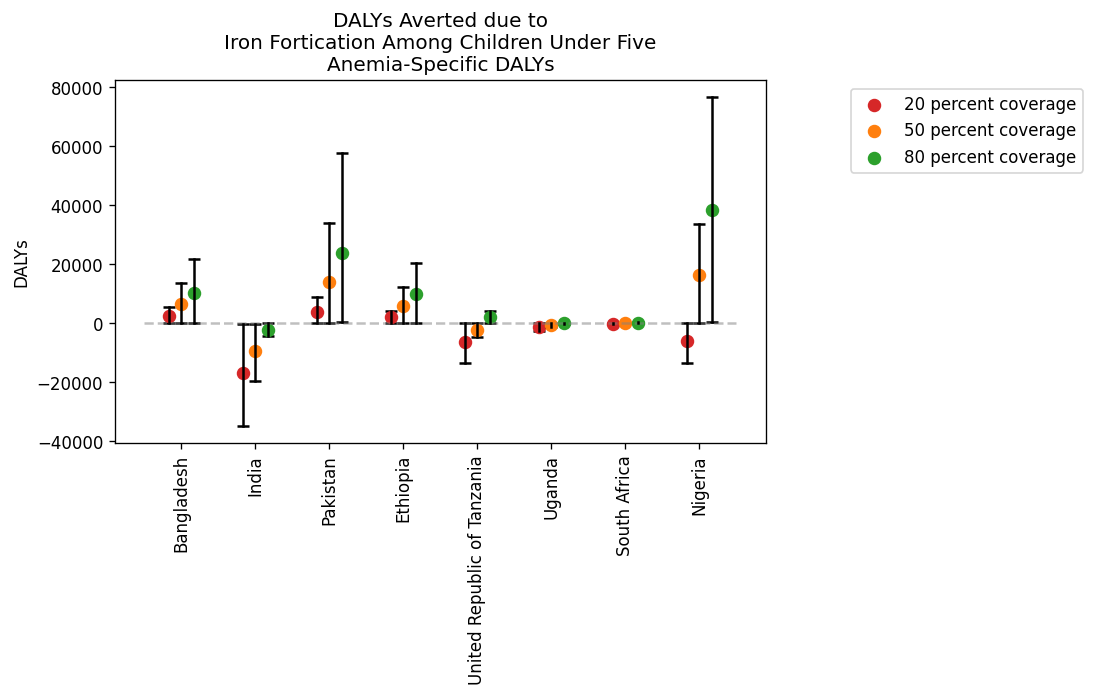

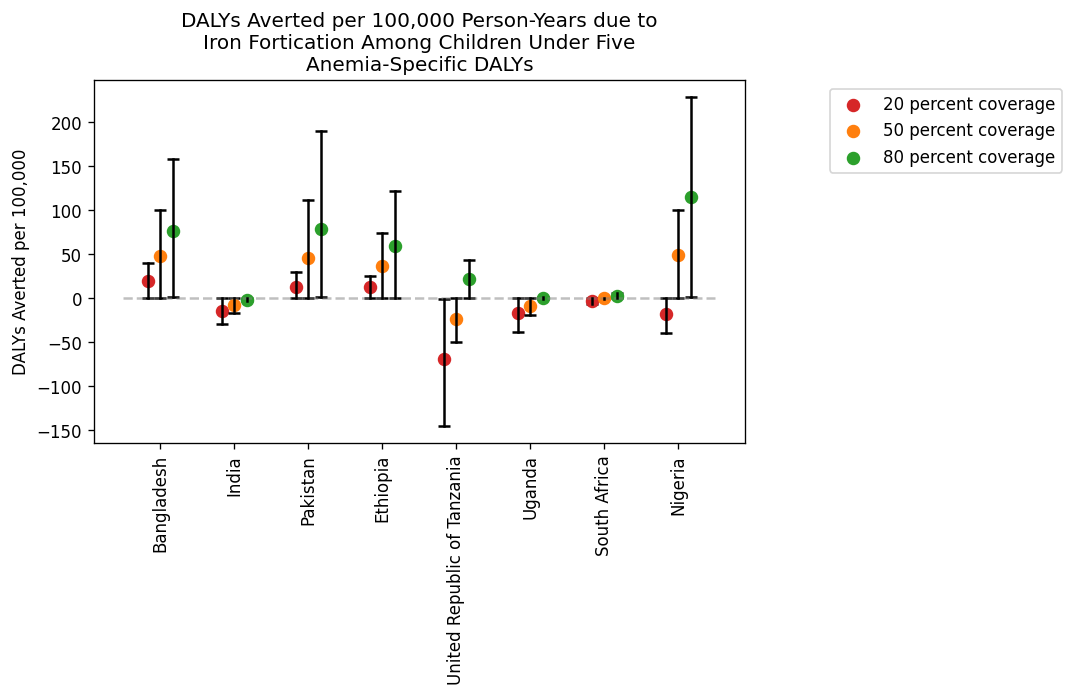

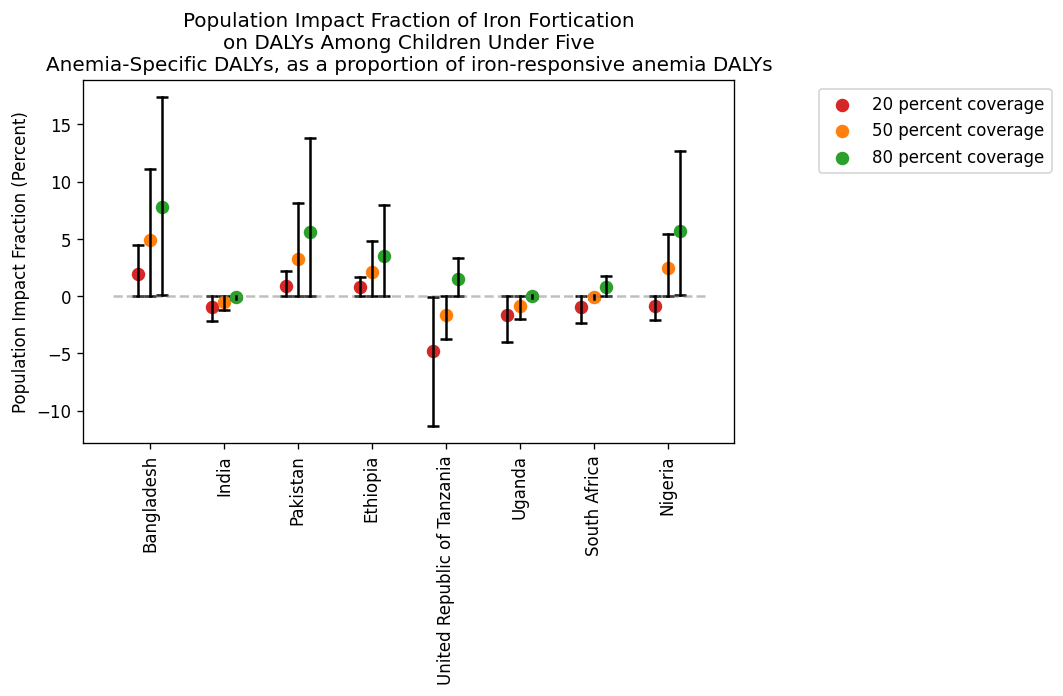

In [32]:
make_dot_plots(
    anemia_counts_averted, 
    'Iron', 
    'counts', 
    coverage_levels, 'Anemia-Specific DALYs')

make_dot_plots(
    anemia_rates_averted, 
    'Iron', 
    'rates', 
    coverage_levels, 'Anemia-Specific DALYs')

make_dot_plots(
    anemia_pifs, 
    'Iron', 
    'pifs', 
    coverage_levels, 'Anemia-Specific DALYs, as a proportion of iron-responsive anemia DALYs')

# LBWSG to be added ....